# Classification

# Step 1: Import Libraries

In [2]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Warnings
import warnings
warnings.filterwarnings("ignore")


# Step2: Load the data

In [4]:
# Here I am Loading  the iris dataset from sklearn
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Display first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Step 3:Explore the Iris Data

In [5]:
# Shape and data info
print("Shape of the dataset:", df.shape)
df.info()


Shape of the dataset: (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [7]:
# Great no missing values. It is clean

In [8]:
df.describe() # statistical Summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# step 4: Exploratory Data Analysis (EDA)

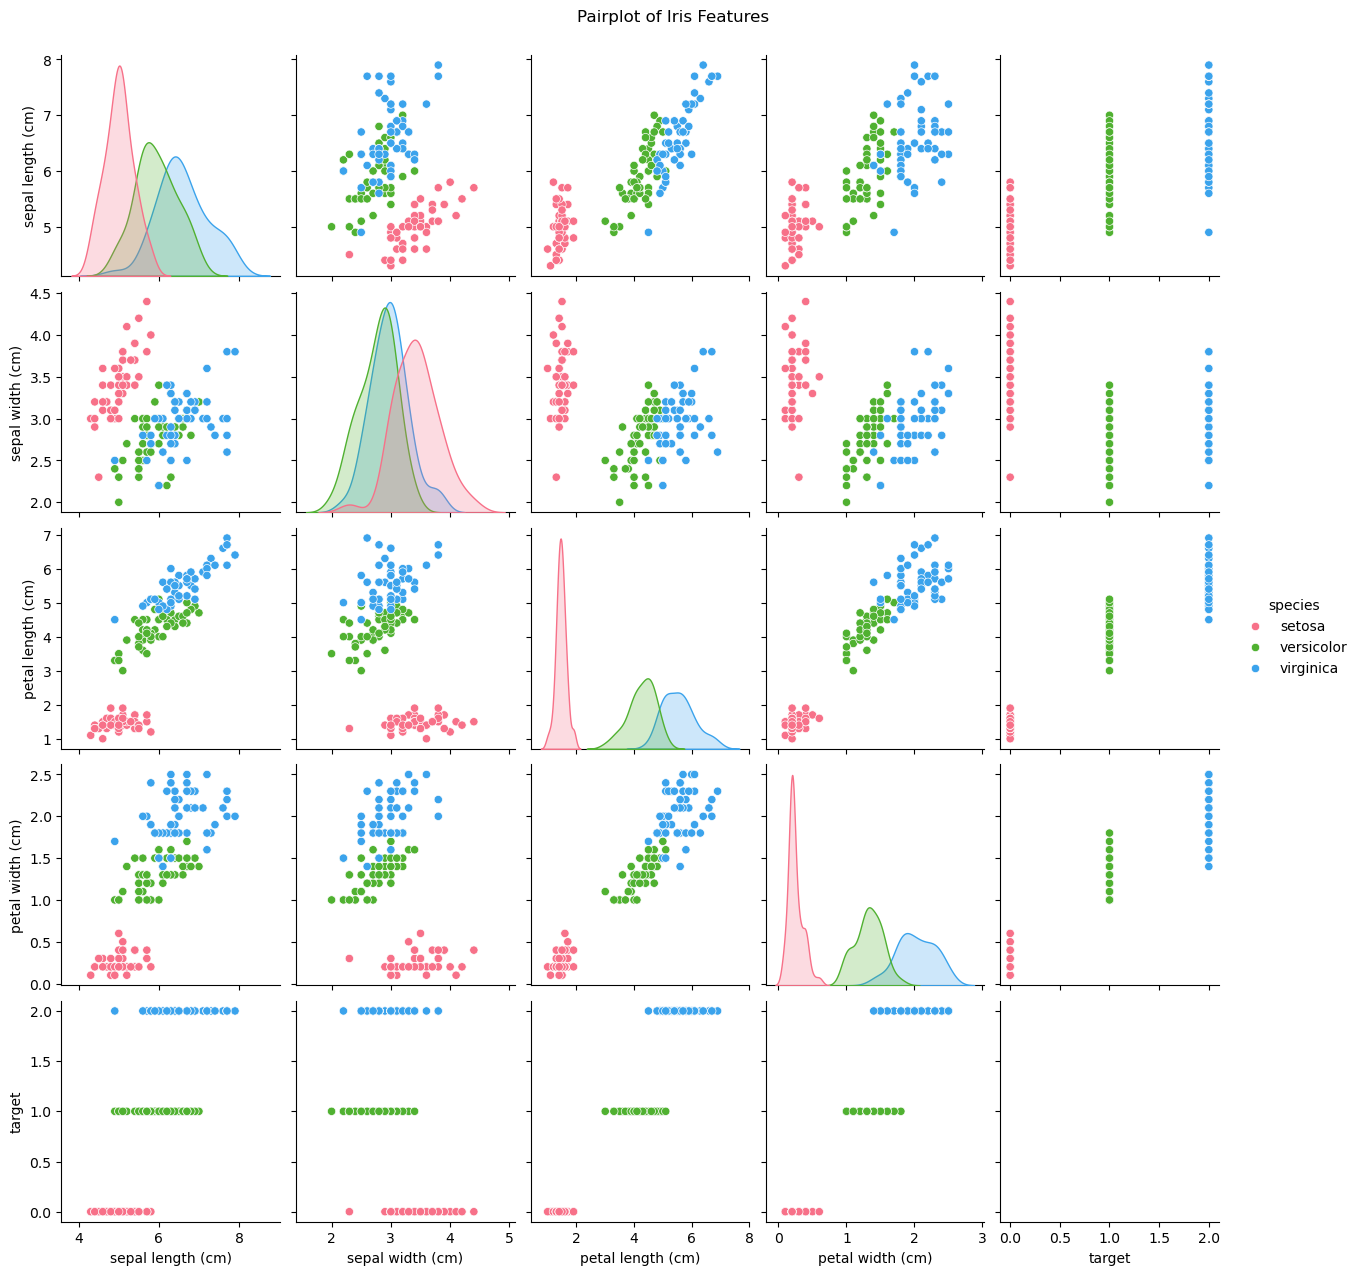

In [11]:
sns.pairplot(df, hue="species", palette="husl")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


In [12]:
# Explanation: As you can see from above plot: Petal Length and Petal Width are the most distinguishing features.

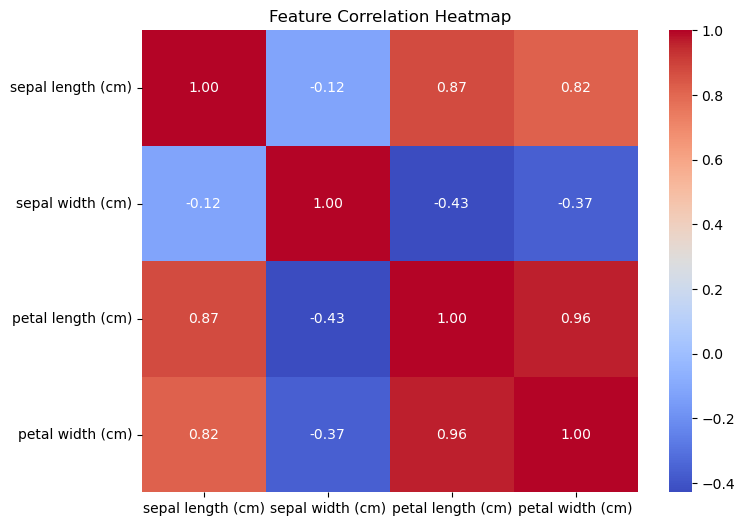

In [18]:
# Plotting Correlation Heatmap

# Compute correlation only for numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



In [19]:
# Explanation: in the iris dataset there is a col. 'species' is string but we are not including it in the correlation heatmap as it used for Target. 
# oly the input feature is considered here.

# step 5: Feature Selection and Data splitting

In [20]:
X = df.iloc[:, :-2]  # Features
y = df['target']     # Target (0, 1, 2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


In [38]:
# Get coefficients: to check the feature importance via coefficient
importance = pd.DataFrame(lr.coef_.T, index=X.columns, columns=iris.target_names)
importance["Mean_Importance"] = importance.abs().mean(axis=1)
importance = importance.sort_values(by="Mean_Importance", ascending=False)

print("\nFeature Importance (mean absolute coefficient):\n")
print(importance)



Feature Importance (mean absolute coefficient):

                     setosa  versicolor  virginica  Mean_Importance
petal width (cm)  -1.686228   -0.807957   2.494185         1.662790
petal length (cm) -1.799056   -0.204074   2.003130         1.335420
sepal length (cm) -1.088945    0.536337   0.552608         0.725963
sepal width (cm)   1.024208   -0.360487  -0.663721         0.682805


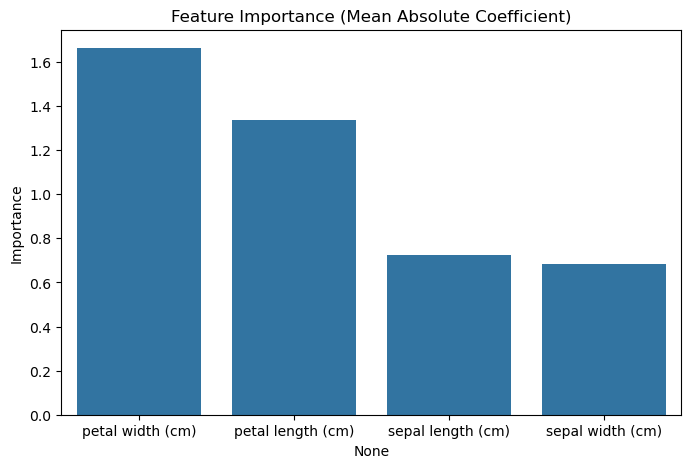

In [40]:
#  visualize the importance

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=importance.index, y=importance["Mean_Importance"])
plt.title("Feature Importance (Mean Absolute Coefficient)")
plt.ylabel("Importance")
plt.show()


# Step 6:Feature Scaling

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Explanation: Features (like sepal length, petal width) are on different scales.
# Scaling improves model convergence and ensures no single feature dominates.

# Step 7: Train the Model (Logistic Regression)

In [23]:
lr = LogisticRegression(random_state=42, multi_class='auto')
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)


# Step 8: Evalaute the Model

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



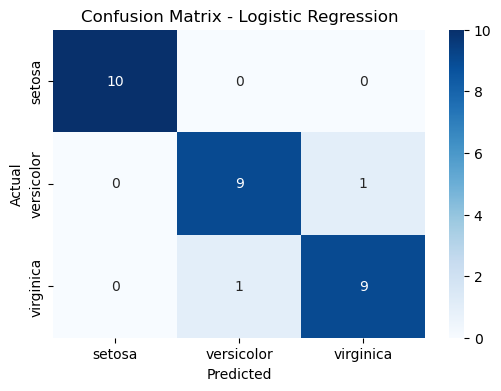

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# Step 9: Cross- Validation

In [26]:
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.91666667 0.95833333 0.95833333 0.95833333 1.        ]
Mean CV Accuracy: 0.9583333333333334


# Step 10: Truing a Decison Tree(for comparison)

In [28]:
tree = DecisionTreeClassifier(random_state=42, max_depth=3)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9666666666666667


In [29]:
# Visualizting the tree

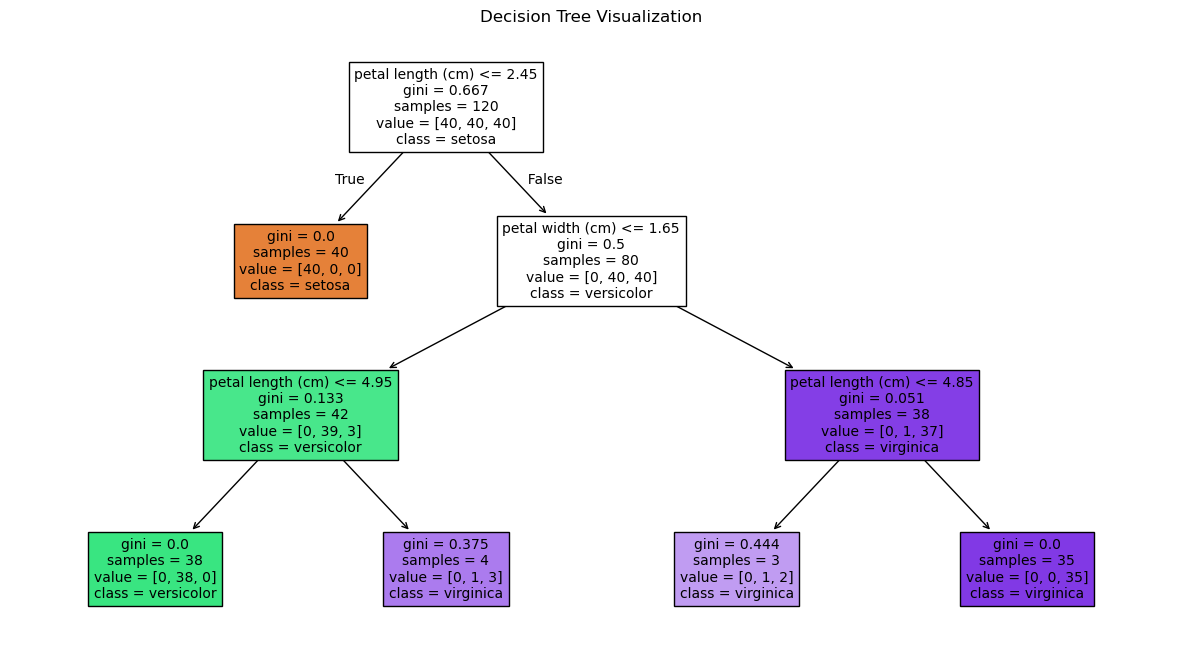

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=iris.target_names, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


# Step 11: Comparing  both the models

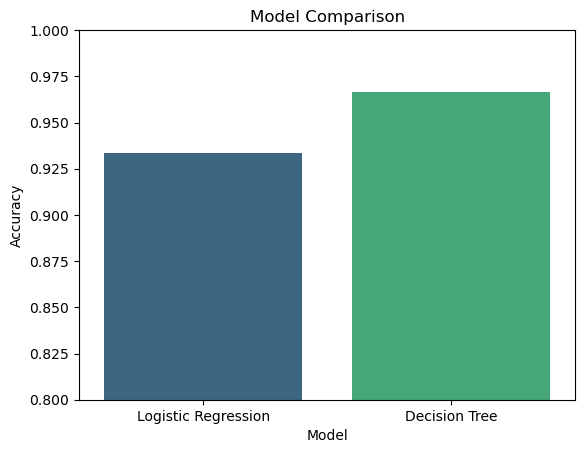

In [31]:
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Decision Tree": accuracy_score(y_test, y_pred_tree)
}

model_df = pd.DataFrame(models.items(), columns=["Model", "Accuracy"])
sns.barplot(x="Model", y="Accuracy", data=model_df, palette="viridis")
plt.title("Model Comparison")
plt.ylim(0.8, 1.0)
plt.show()


# Step 12: Summary and Insights

#### Logistic Regression Accuracy: ~96–98%

#### Decision Tree Accuracy: ~93–97%


#### Petal length & Petal width are the most important predictors.